# 기본 준비

In [ ]:
# colab
from google.colab import drive
drive.mount('/content/drive')

## packages

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

## 함수

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba): 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision") 
    plt.plot(thresholds, recalls[0:threshold_boundary],label="recall")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel("Threshold")
    plt.ylabel("Precision and Recall")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    return [confusion, accuracy, precision, recall, f1, roc_auc]


def get_eval_by_threshold(y_test, pred, pred_proba, thresholds):
    pred_proba = pred_proba.reshape(-1, 1)

    df = pd.DataFrame(columns=col_list)
    
    for custom_threshold in thresholds:
        binar = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binar.transform(pred_proba)
        evals = [custom_threshold] + get_clf_eval(y_test, custom_predict, pred_proba)
        df = pd.concat([df, pd.DataFrame([evals], 
                                         columns=col_list)], ignore_index=True)
    
    return df


col_list = ["threshold", "confusion", "accuracy", "precision", "recall", "f1", "roc_auc"]

In [ ]:
# colab
# data_path = "/content/drive/MyDrive/multicampus/data/" 
# save_path = "/content/drive/MyDrive/multicampus/data/"
# data_path = "/content/drive/MyDrive/"

# jupyter
data_path = "../data/"
save_path = "./"

In [ ]:
def prepare_data_smote():
    brfss = pd.read_csv(data_path + "brfss.csv")
    X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
    y = brfss["HEARTDISEASE"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(y_train.value_counts())
    print(y_test.value_counts())
    
    return X_train, X_test, y_train, y_test

In [ ]:
def prepare_data_checkup():
    checkup = pd.read_csv(data_path + "checkup_221227.csv")
    X = checkup.drop(["지역", "ALCOHOL"], axis=1)
    region = checkup[["지역"]]
    
    return X, region

# 최종 모델 선택

## 모델 불러오기

In [ ]:
final_result = pd.read_csv(save_path + "final.csv")
final_result = final_result.sort_values("precision", ascending=False)

In [ ]:
len(final_result)

6

## 임계값

In [ ]:
X_train, X_test, y_train, y_test = prepare_data_smote()

0.0    286704
1.0    286704
Name: HEARTDISEASE, dtype: int64
0.0    71720
1.0     4010
Name: HEARTDISEASE, dtype: int64


---

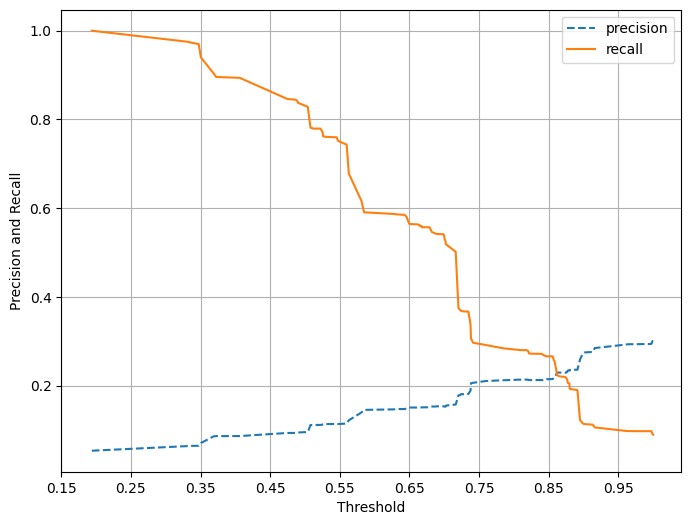

In [ ]:
model_1 = eval(final_result["model"][0])
model_1.fit(X_train, y_train)

pred_1 = model_1.predict(X_test)
pred_proba_1 = model_1.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_1)

In [ ]:
thresholds = np.arange(.85, .90, .01)
df1 = get_eval_by_threshold(y_test, pred_1, pred_proba_1, thresholds)
df1

,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.85,"[[67815, 3905], [2944, 1066]]",0.909560,0.214444,0.265835,0.237390,0.775452
1,0.86,"[[68708, 3012], [3115, 895]]",0.919094,0.229076,0.223192,0.226096,0.775452
2,0.87,"[[68756, 2964], [3131, 879]]",0.919517,0.228728,0.219202,0.223863,0.775452
3,0.88,"[[69182, 2538], [3236, 774]]",0.923755,0.233696,0.193017,0.211418,0.775452
4,0.89,"[[69251, 2469], [3249, 761]]",0.924495,0.235604,0.189776,0.210221,0.775452
5,0.90,"[[70523, 1197], [3557, 453]]",0.937224,0.274545,0.112968,0.160071,0.775452


---

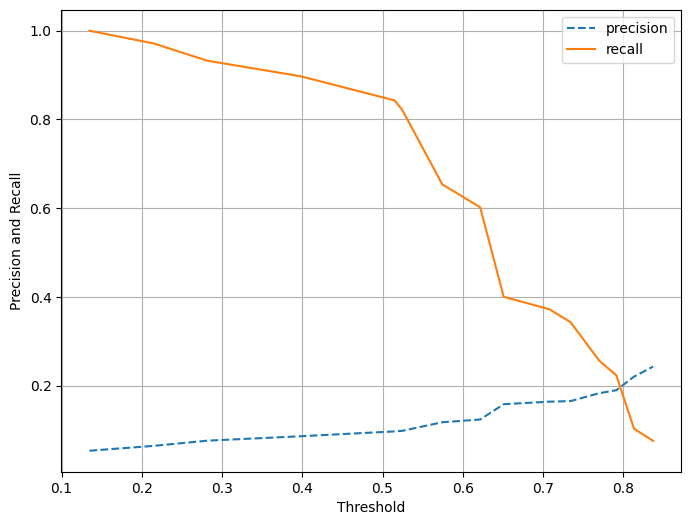

In [ ]:
model_2 = eval(final_result["model"][1])
model_2.fit(X_train, y_train)

pred_2 = model_2.predict(X_test)
pred_proba_2 = model_2.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_2)

In [ ]:
thresholds = np.arange(.75, .85, .01)
df2 = get_eval_by_threshold(y_test, pred_2, pred_proba_2, thresholds)
df2

D:\study\Anaconda\envs\multicampus\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.75,"[[67142, 4578], [2986, 1024]]",0.900119,0.182792,0.255362,0.213067,0.761278
1,0.76,"[[67142, 4578], [2986, 1024]]",0.900119,0.182792,0.255362,0.213067,0.761278
2,0.77,"[[67142, 4578], [2986, 1024]]",0.900119,0.182792,0.255362,0.213067,0.761278
3,0.78,"[[67888, 3832], [3115, 895]]",0.908266,0.189338,0.223192,0.204876,0.761278
4,0.79,"[[67888, 3832], [3115, 895]]",0.908266,0.189338,0.223192,0.204876,0.761278
5,0.80,"[[70263, 1457], [3599, 411]]",0.933236,0.220021,0.102494,0.139843,0.761278
6,0.81,"[[70263, 1457], [3599, 411]]",0.933236,0.220021,0.102494,0.139843,0.761278
7,0.82,"[[70781, 939], [3709, 301]]",0.938624,0.242742,0.075062,0.114667,0.761278
8,0.83,"[[70781, 939], [3709, 301]]",0.938624,0.242742,0.075062,0.114667,0.761278
9,0.84,"[[71720, 0], [4010, 0]]",0.947049,0.000000,0.000000,0.000000,0.761278


---

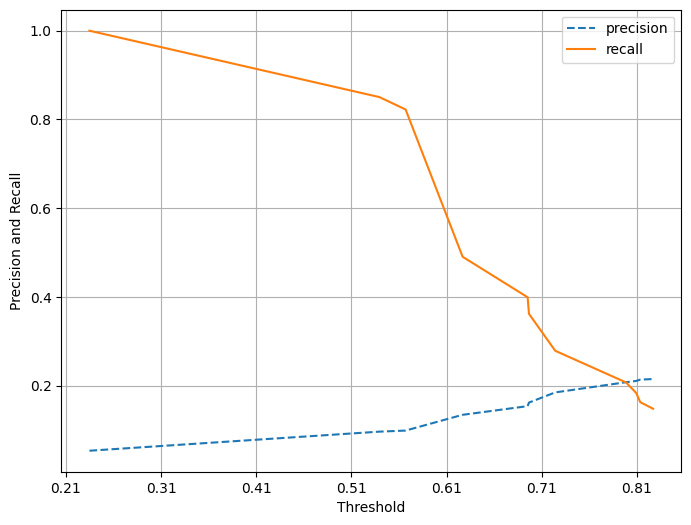

In [ ]:
model_3 = eval(final_result["model"][2])
model_3.fit(X_train, y_train)

pred_3 = model_3.predict(X_test)
pred_proba_3 = model_3.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_3)

In [ ]:
thresholds = np.arange(.71, .81, .01)
df3 = get_eval_by_threshold(y_test, pred_3, pred_proba_3, thresholds)
df3

,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.71,"[[66786, 4934], [2894, 1116]]",0.896633,0.184463,0.278304,0.221869,0.746457
1,0.72,"[[66786, 4934], [2894, 1116]]",0.896633,0.184463,0.278304,0.221869,0.746457
2,0.73,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
3,0.74,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
4,0.75,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
5,0.76,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
6,0.77,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
7,0.78,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
8,0.79,"[[68548, 3172], [3180, 830]]",0.916123,0.207396,0.206983,0.207189,0.746457
9,0.80,"[[68960, 2760], [3275, 735]]",0.920309,0.210300,0.183292,0.195869,0.746457


---

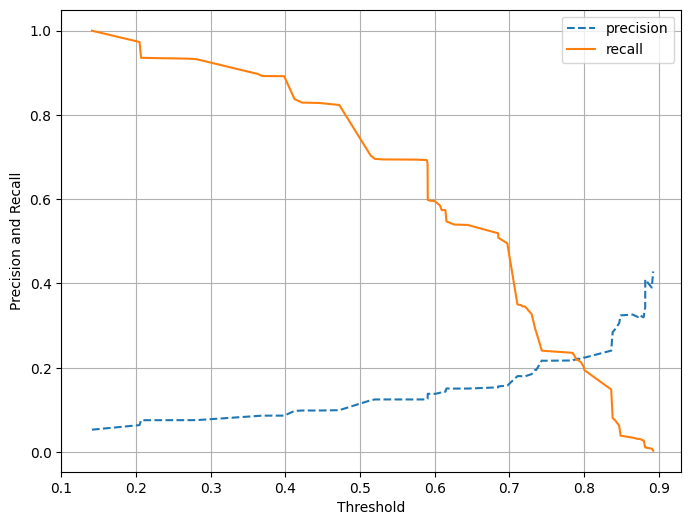

In [ ]:
model_4 = eval(final_result["model"][3])
model_4.fit(X_train, y_train)

pred_4 = model_4.predict(X_test)
pred_proba_4 = model_4.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_4)

In [ ]:
thresholds = np.arange(.7, .8, .01)
df4 = get_eval_by_threshold(y_test, pred_4, pred_proba_4, thresholds)
df4

,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.70,"[[65326, 6394], [2606, 1404]]",0.881157,0.180046,0.350125,0.237805,0.775645
1,0.71,"[[65326, 6394], [2606, 1404]]",0.881157,0.180046,0.350125,0.237805,0.775645
2,0.72,"[[65388, 6332], [2624, 1386]]",0.881738,0.179580,0.345636,0.236357,0.775645
3,0.73,"[[66871, 4849], [2836, 1174]]",0.898521,0.194919,0.292768,0.234028,0.775645
4,0.74,"[[68233, 3487], [3044, 966]]",0.913759,0.216932,0.240898,0.228288,0.775645
5,0.75,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775645
6,0.76,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775645
7,0.77,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775645
8,0.78,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775645
9,0.79,"[[68640, 3080], [3135, 875]]",0.917932,0.221239,0.218204,0.219711,0.775645


---

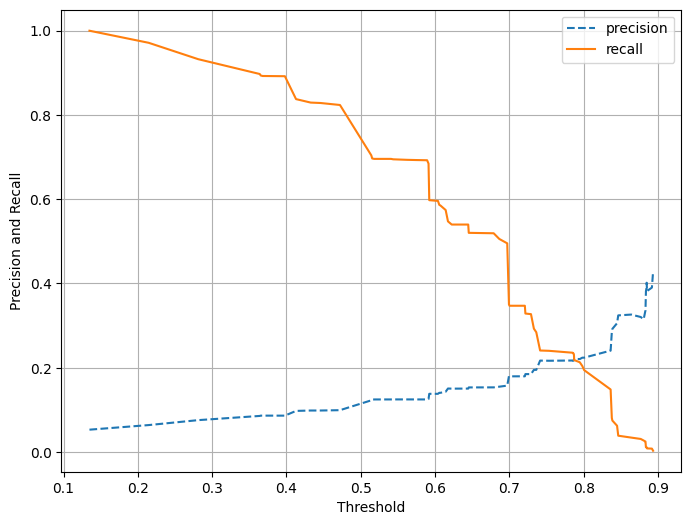

In [ ]:
model_5 = eval(final_result["model"][4])
model_5.fit(X_train, y_train)

pred_5 = model_5.predict(X_test)
pred_proba_5 = model_5.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_5)

In [ ]:
thresholds = np.arange(.7, .8, .01)
df5 = get_eval_by_threshold(y_test, pred_5, pred_proba_5, thresholds)
df5

,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.70,"[[65360, 6360], [2618, 1392]]",0.881447,0.179567,0.347132,0.236694,0.775155
1,0.71,"[[65363, 6357], [2618, 1392]]",0.881487,0.179636,0.347132,0.236755,0.775155
2,0.72,"[[65363, 6357], [2618, 1392]]",0.881487,0.179636,0.347132,0.236755,0.775155
3,0.73,"[[66871, 4849], [2836, 1174]]",0.898521,0.194919,0.292768,0.234028,0.775155
4,0.74,"[[68233, 3487], [3044, 966]]",0.913759,0.216932,0.240898,0.228288,0.775155
5,0.75,"[[68236, 3484], [3047, 963]]",0.913759,0.216550,0.240150,0.227740,0.775155
6,0.76,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775155
7,0.77,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775155
8,0.78,"[[68313, 3407], [3065, 945]]",0.914538,0.217142,0.235661,0.226022,0.775155
9,0.79,"[[68702, 3018], [3156, 854]]",0.918474,0.220558,0.212968,0.216696,0.775155


---

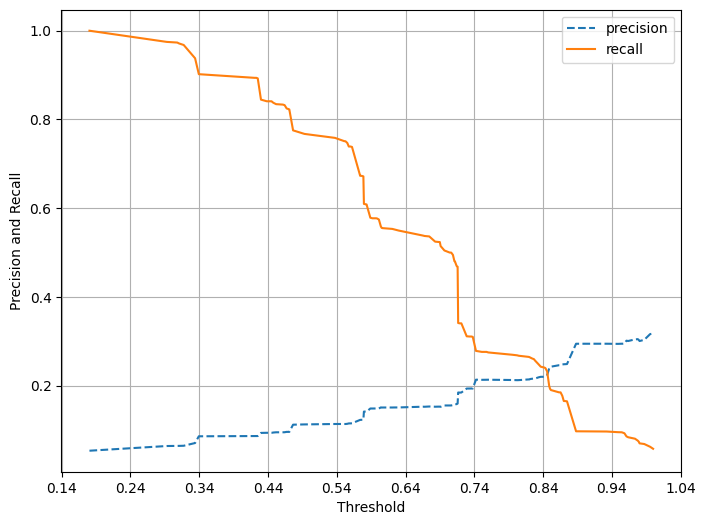

In [ ]:
model_6 = eval(final_result["model"][5])
model_6.fit(X_train, y_train)

pred_6 = model_6.predict(X_test)
pred_proba_6 = model_6.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_6)

In [ ]:
thresholds = np.arange(.84, .90, .01)
df6 = get_eval_by_threshold(y_test, pred_6, pred_proba_6, thresholds)
df6

,threshold,confusion,accuracy,precision,recall,f1,roc_auc
0,0.84,"[[68291, 3429], [3045, 965]]",0.914512,0.219618,0.240648,0.229653,0.774272
1,0.85,"[[69287, 2433], [3237, 773]]",0.925129,0.241110,0.192768,0.214246,0.774272
2,0.86,"[[69449, 2271], [3270, 740]]",0.926832,0.245766,0.184539,0.210796,0.774272
3,0.87,"[[69712, 2008], [3348, 662]]",0.929275,0.247940,0.165087,0.198204,0.774272
4,0.88,"[[70789, 931], [3622, 388]]",0.939879,0.294162,0.096758,0.145618,0.774272
5,0.89,"[[70794, 926], [3624, 386]]",0.939918,0.294207,0.096259,0.145058,0.774272
6,0.90,"[[70794, 926], [3624, 386]]",0.939918,0.294207,0.096259,0.145058,0.774272


## 모델 선택

|model_num|threshold|confusion|accuracy|precision|recall|f1|roc_auc|
|---|---|---|---|---|---|---|---|
|1|0.88|[[69182, 2538], [3236, 774]]|0.923755|0.233696|0.193017|0.211418|0.775452
|2|0.80|[[70263, 1457], [3599, 411]]|0.933236|0.220021|0.102494|0.139843|0.761278
|3|0.73|[[68548, 3172], [3180, 830]]|0.916123|0.207396|0.206983|0.207189|0.746457
|4|0.73|[[66871, 4849], [2836, 1174]]|0.898521|0.194919|0.292768|0.234028|0.775645
|5|0.74|[[68233, 3487], [3044, 966]]|0.913759|0.216932|0.240898|0.228288|0.775155
|6|0.85|[[69287, 2433], [3237, 773]]|0.925129|0.241110|0.192768|0.214246|0.774272

---
```SGDClassifier(alpha=0.0001, loss="modified_huber", penalty="l1")```

In [ ]:
model_6

SGDClassifier(early_stopping=True, loss='modified_huber', penalty='l1')

# 건강검진 데이터에 적용

In [ ]:
X, region = prepare_data_checkup()

In [ ]:
len(X)

2039244

In [ ]:
checkup_pred = model_6.predict(X)
checkup_pred_proba = model_6.predict_proba(X)[:, 1]

checkup_pred_proba = checkup_pred_proba.reshape(-1, 1)
binar = Binarizer(threshold=.85).fit(checkup_pred_proba)
checkup_pred_custom = binar.transform(checkup_pred_proba)
checkup_pred_custom.shape

(2039244, 1)

In [ ]:
pd.DataFrame(checkup_pred_custom).value_counts()

0.0    2016977
1.0      22267
dtype: int64

In [ ]:
region["HEARTDISEASE"] = checkup_pred_custom
region.head()

,지역,HEARTDISEASE
0,세종특별자치시,0.0
1,대구광역시,0.0
2,서울특별시,0.0
3,울산광역시,0.0
4,경기도,0.0


In [ ]:
region.to_csv(data_path + "checkup_classified.csv", index=False)